Library


In [1]:
import numpy as np
import math
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import train_test_split

Konstanta


In [2]:
RANDOM_STATE = 21

# Dataset Inference


## Load


Dir


In [3]:
MAIN_PATH = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar"
# MAIN_PATH = 

Raw


In [4]:
with open(MAIN_PATH + r"\Dataset\dataset_preprocessed.pkl", "rb") as f:
    dataset = pickle.load(f)

In [5]:
len(dataset)

793

Normalisasi, Split, dan Batching


In [6]:
X = [[data[3], data[4]] for data in dataset]
original_labels = [int(data[2]) for data in dataset]
y = [label for label in original_labels]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_STATE, stratify=y_test)

In [8]:
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)
X_val_scaled = scl.transform(X_val)

## Analisa Statistik


In [9]:
t1 = 0
t2 = 0

for i in y:
    if i == 1:
        t1 += 1
    else:
        t2 += 1

print(t1, t2)

109 684


Describe


In [ ]:
df_raw = pd.DataFrame(X, columns=['rms', 'zcr'])
df_raw['label'] = y

In [11]:
for label in df_raw['label'].unique():
    print(f"Label: {label}")
    display(df_raw[df_raw['label'] == label].describe().T)

Label: 2


,count,mean,std,min,25%,50%,75%,max
rms,461.0,0.024117,0.031788,0.0,0.002779,0.010696,0.032777,0.233416
zcr,461.0,5389.292842,4319.349303,0.0,1219.000000,5227.000000,9013.000000,14691.000000
label,461.0,2.000000,0.000000,2.0,2.000000,2.000000,2.000000,2.000000


Label: 0


,count,mean,std,min,25%,50%,75%,max
rms,223.0,0.054318,0.035960,0.003555,0.027544,0.045278,0.079295,0.184377
zcr,223.0,9320.762332,2648.706282,3323.000000,7469.500000,9670.000000,11055.500000,13908.000000
label,223.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Label: 1


,count,mean,std,min,25%,50%,75%,max
rms,109.0,0.177941,0.107417,0.015611,0.092455,0.13977,0.254718,0.448288
zcr,109.0,4608.871560,3007.185100,387.000000,2111.000000,3631.00000,7218.000000,14626.000000
label,109.0,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Visualization


<Axes: title={'center': 'rms'}, xlabel='label'>

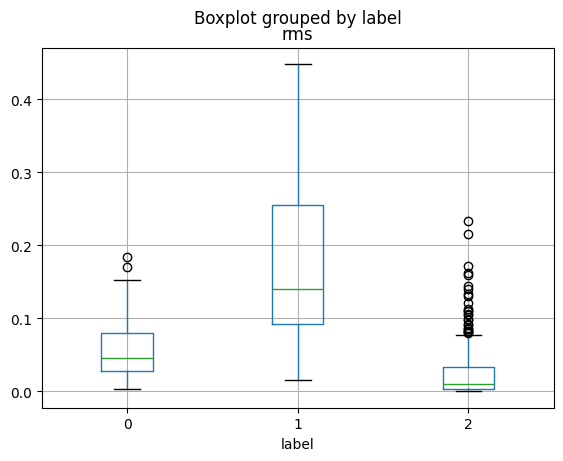

In [12]:
df_raw.boxplot(column=['rms'], by='label')

<Axes: title={'center': 'zcr'}, xlabel='label'>

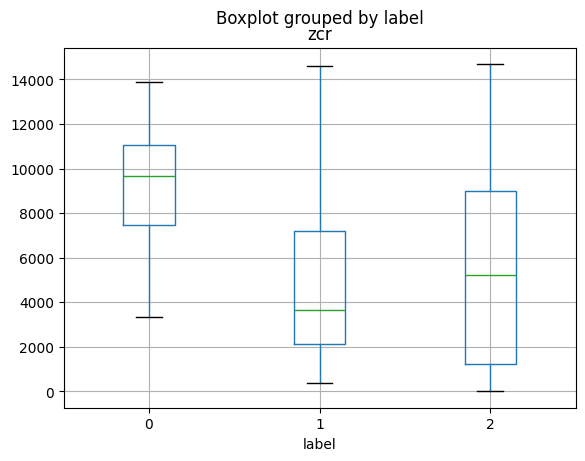

In [13]:
df_raw.boxplot(column=['zcr'], by='label')

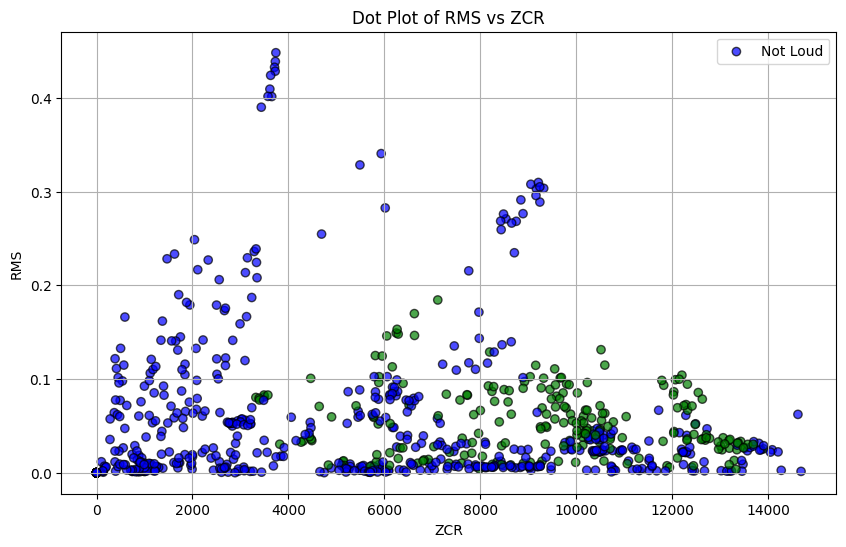

In [31]:
colors = df_raw['label'].map({2: 'blue', 1: 'blue', 0:'green'})

plt.figure(figsize=(10, 6))
plt.scatter(df_raw['zcr'], df_raw['rms'], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel('ZCR')
plt.ylabel('RMS')
plt.title('Dot Plot of RMS vs ZCR')
plt.grid(True)
plt.legend(labels=['Not Loud', 'Loud'])
plt.show()

In [21]:
data_copy = dataset.copy()

In [24]:
data_copy[0]

['C:\\Users\\Lulay\\Documents\\GitHub\\Dasar-Kecerdasan-Artificial_Tugas-Besar\\Dataset\\xeno-canto\\19655.mp3',
 [0.0, 1.0],
 2,
 0.012409585523878887,
 11094.0,
 array([[2.16197470e-13, 1.03119000e-09, 1.56593188e-07, ...,
         7.38014642e-07, 4.86190822e-07, 3.69650615e-05],
        [1.71594322e-13, 1.73647630e-09, 6.84359839e-08, ...,
         1.20641453e-06, 1.28787660e-06, 3.60378650e-05],
        [2.33699181e-13, 1.29767993e-09, 1.06911272e-08, ...,
         1.49087633e-06, 7.68526166e-06, 5.72646908e-05],
        ...,
        [3.98201299e-13, 4.03694204e-11, 6.71124721e-10, ...,
         2.79048998e-07, 2.46822598e-07, 8.22193067e-07],
        [5.72516160e-13, 3.12001303e-11, 4.63515168e-10, ...,
         3.61625092e-07, 2.90140389e-07, 8.36865461e-07],
        [8.76847812e-13, 2.16880748e-11, 3.50852229e-10, ...,
         2.80869441e-07, 2.98575333e-07, 8.50766193e-07]])]

In [26]:
for i in range(len(data_copy)):
    if "xeno-canto" in data_copy[i][0]:
        data_copy[i][2] = 1
    else:
        data_copy[i][2] = 2

In [28]:
data_copy = [[data[0], data[1], data[2], data[3], data[4]] for data in data_copy]

In [29]:
data_copy = pd.DataFrame(data_copy, columns=['file', 'segment', 'label', 'rms', 'zcr'])

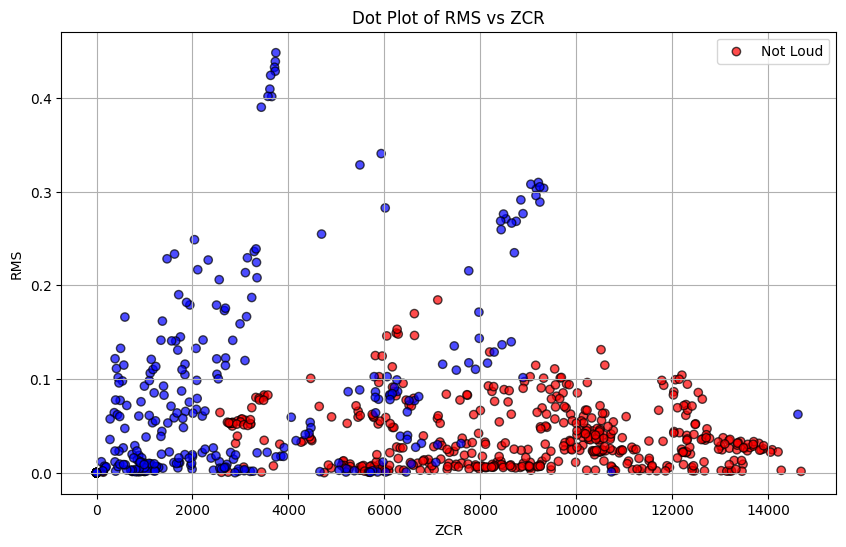

In [30]:
colors = data_copy['label'].map({2: 'blue', 1: 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(data_copy['zcr'], data_copy['rms'], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel('ZCR')
plt.ylabel('RMS')
plt.title('Dot Plot of RMS vs ZCR')
plt.grid(True)
plt.legend(labels=['Not Loud', 'Loud'])
plt.show()

Hyperparameters


# Fuzzy dan Fungsi


Membership Functions


Fuzzy Sets


## Visualize Fuzzy Function


## Fuzzy Inference System


### Mamdani Inference Engine


## Classification


# Example


Label 1 (Suara Keras)


Label 2 (Suara Background)


# Inference
